In [98]:
def activation_potential(inputs, weights):
    potential = np.dot(inputs, weights)     
    return potential

In [99]:
import numpy as np
import matplotlib.pyplot as plt

inputs =  [1 , 2, 3, 4]
weights = [np.random.randn() for i in range(len(inputs))]
print(weights)

neuron_potential =  activation_potential(inputs, weights)
print("Potencjal neuronu:", neuron_potential)

[0.23081680206488067, 0.6829968674757372, -0.4610133724822717, 0.14714214937246226]
Potencjal neuronu: 0.8023390170593889


In [100]:
# zdanie 2

# Funkcja liniowa
def linear(potential):
    return potential

# Funkcja sigmoid
def sigmoid(potential):
    return 1 / (1 + np.exp(-potential))

# Funkcja tanh
def tanh(potential):
    return np.tanh(potential)

# Funkcja ReLU
def relu(potential):
    return np.maximum(0, potential)

In [101]:
# wejscie - potencjał neuronu
# wyjscie - wyjście neuronu dla zadanej funkcji aktywacji
def neuron_output(neuron_potential, function):
    match function:
        case 'linear':
            return linear(neuron_potential)
        case 'sigmoid':
            return sigmoid(neuron_potential)
        case 'tanh':
            return tanh(neuron_potential)
        case 'relu':
            return relu(neuron_potential)
        case _:
            raise ValueError("Nieznana funkcja aktywacji") 

In [102]:
inputs =  [1 , 2, 3, 4]
weights = [np.random.randn() for i in range(len(inputs))]
print(weights)
neuron_potential =  activation_potential(inputs, weights)

print("Potencjal neuronu:", neuron_potential)

print("Linear:", neuron_output(neuron_potential, "linear"))
print("Sigmoid:", neuron_output(neuron_potential, "sigmoid"))
print("Tanh:", neuron_output(neuron_potential, "tanh"))
print("ReLU:", neuron_output(neuron_potential, "relu"))

[-1.149125151444041, -0.23907348733084788, 1.1864860299484832, 0.6303491358096376]
Potencjal neuronu: 4.453582506978263
Linear: 4.453582506978263
Sigmoid: 0.9884970542401532
Tanh: 0.9997292062885781
ReLU: 4.453582506978263


In [128]:
#zadanie 3
def plot_activation(ak):
    linear_neuron = []
    sigmoid_neuron = []
    print(len(linear_neuron))
    tanh_neuron = []
    relu_neuron = []
    for j in range(4):    
        for i in range(len(ak)):
            
            match j:
                case 0:
                    linear_neuron.append(neuron_output(ak[i], "linear"))
                case 1:
                    sigmoid_neuron.append(neuron_output(ak[i], "sigmoid"))
                case 2:
                    tanh_neuron.append(neuron_output(ak[i], "tanh"))
                case 3:
                    relu_neuron.append(neuron_output(ak[i], "relu"))

    print(len(linear_neuron))
    plt.scatter(ak, linear_neuron, s=10)
    plt.scatter(ak, sigmoid_neuron, s=10)
    plt.scatter(ak, tanh_neuron, s=10)
    plt.scatter(ak, relu_neuron, s=10)

In [132]:
#zadanie 4
import numpy as np

class ActivationFcn:
    def __init__(self):
        # Inicjalizacja nazw funkcji aktywacji
        self.functions = ['linear', 'sigmoid', 'tanh', 'relu']
    
    def linear(self, x):
        """Funkcja tożsamości (liniowa)"""
        return x

    def sigmoid(self, x):
        """Funkcja logistyczna"""
        return 1 / (1 + np.exp(-x))

    def tanh(self, x):
        """Funkcja tangensu hiperbolicznego"""
        return np.tanh(x)

    def relu(self, x):
        """Funkcja ReLU"""
        return np.maximum(0, x)

    def output(self, x, activation_type):
        """Wyznaczanie wyjścia dla zadanej funkcji aktywacji"""
        if activation_type not in self.functions:
            raise ValueError(f"Nieznana funkcja aktywacji: {activation_type}")

        # Wywołanie odpowiedniej funkcji aktywacji
        return getattr(self, activation_type)(x)

# Funkcja do obliczenia potencjału neuronu
def activation_potential(inputs, weights):
    return np.dot(inputs, weights)

# Przykład użycia
if __name__ == "__main__":
    # Definiowanie wejść i wag
    inputs = np.array([0.5, 0.2, 0.1])  # Przykładowe wartości wejściowe
    weights = np.random.randn(inputs.shape[0])  # Losowe wagi dla neuronu

    # Obliczenie potencjału neuronu
    potential = activation_potential(inputs, weights)
    print(f"Potencjał neuronu: {potential}")

    # Tworzenie obiektu klasy ActivationFcn
    activation = ActivationFcn()

    # Wyznaczanie wyjść dla różnych funkcji aktywacji
    for func in activation.functions:
        output_value = activation.output(potential, func)
        print(f"Wyjście dla funkcji aktywacji '{func}': {output_value}")

Potencjał neuronu: 0.4734708263282015
Wyjście dla funkcji aktywacji 'linear': 0.4734708263282015
Wyjście dla funkcji aktywacji 'sigmoid': 0.6162049247516022
Wyjście dla funkcji aktywacji 'tanh': 0.4409994078676162
Wyjście dla funkcji aktywacji 'relu': 0.4734708263282015


In [131]:
#zadanie 5
import numpy as np

def mse(expected, output):
    """
    Funkcja obliczająca błąd średnio kwadratowy (MSE).
    
    Parametry:
    expected -- oczekiwane wartości
    output -- wartości wyjściowe wyznaczone przez model
    
    Zwraca:
    mse_value -- wartość błędu średnio kwadratowego
    """
    expected = np.array(expected)  # Konwersja na tablicę NumPy
    output = np.array(output)  # Konwersja na tablicę NumPy
    mse_value = np.mean((expected - output) ** 2)  # Obliczenie MSE
    return mse_value

def binary_cross_entropy(expected, output):
    """
    Funkcja obliczająca binarną entropię krzyżową.
    
    Parametry:
    expected -- oczekiwane wartości (0 lub 1)
    output -- wartości wyjściowe wyznaczone przez model (w zakresie 0-1)
    
    Zwraca:
    bce_value -- wartość entropii krzyżowej
    """
    expected = np.array(expected)  # Konwersja na tablicę NumPy
    output = np.array(output)  # Konwersja na tablicę NumPy

    # Zapobieganie log(0) poprzez dodanie małej wartości epsilon
    epsilon = 1e-15
    output = np.clip(output, epsilon, 1 - epsilon)  # Ograniczenie wartości do (epsilon, 1-epsilon)

    bce_value = -np.mean(expected * np.log(output) + (1 - expected) * np.log(1 - output))  # Obliczenie BCE
    return bce_value

# Przykład użycia
if __name__ == "__main__":
    expected = [0, 1, 1, 0, 1]  # Oczekiwane wartości
    output = [0.1, 0.9, 0.8, 0.3, 0.7]  # Przewidywane wartości przez model

    mse_value = mse(expected, output)
    bce_value = binary_cross_entropy(expected, output)

    print(f"Błąd średnio kwadratowy (MSE): {mse_value}")
    print(f"Binarna entropia krzyżowa (BCE): {bce_value}")

Błąd średnio kwadratowy (MSE): 0.048
Binarna entropia krzyżowa (BCE): 0.22944289410146546


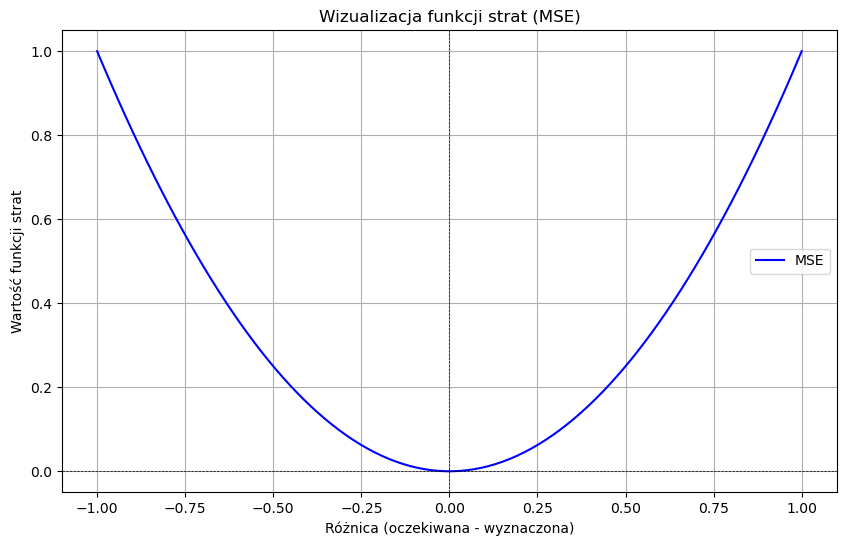

In [133]:
import numpy as np
import matplotlib.pyplot as plt

def mse(expected, output):
    """Funkcja obliczająca błąd średnio kwadratowy (MSE)."""
    return np.mean((expected - output) ** 2)

def visualize_loss(expected_value, predicted_value):
    """
    Funkcja do wizualizacji zmian przebiegu funkcji strat.
    
    Parametry:
    expected_value -- oczekiwana wartość
    predicted_value -- wyznaczona wartość przez model
    """
    # Tworzenie zakresu różnic
    differences = np.linspace(-1, 1, 100)  # Różnice od -1 do 1
    losses = []

    # Obliczanie wartości funkcji strat dla różnych różnic
    for diff in differences:
        # Obliczamy nową wyznaczoną wartość na podstawie różnicy
        current_output = expected_value + diff
        loss_value = mse(expected_value, current_output)  # Obliczamy MSE
        losses.append(loss_value)

    # Tworzenie wykresu
    plt.figure(figsize=(10, 6))
    plt.plot(differences, losses, label='MSE', color='blue')
    plt.title('Wizualizacja funkcji strat (MSE)')
    plt.xlabel('Różnica (oczekiwana - wyznaczona)')
    plt.ylabel('Wartość funkcji strat')
    plt.axhline(0, color='black', lw=0.5, ls='--')  # Linia pozioma dla wartości 0
    plt.axvline(0, color='black', lw=0.5, ls='--')  # Linia pionowa dla wartości 0
    plt.grid()
    plt.legend()
    plt.show()

# Przykład użycia
if __name__ == "__main__":
    expected_value = 0.5  # Przykładowa wartość oczekiwana
    predicted_value = 0.3  # Przykładowa wartość wyznaczona przez model

    visualize_loss(expected_value, predicted_value)
